# CMSE 201 Final Project

### CMSE 201 Final Project
#### &#9989; Navanidhiy Achuthan Kumaraguru
#### &#9989; Section_003
#### &#9989; 14/04/2024

## How do factors such as language, production country, genre, and budget influence the ratings of movies?

### Background and Motivation

Film combines artistic expression with commercial enterprise. The reception of movies by audiences and critics is shaped by a variety of factors. In the past, language, production country, genre, and budget have all been considered significant factors that affect movie ratings, each contributing to a movie's success in its own way.

Besides serving as a tool for storytelling, language also identifies cultural context. It can limit and enhance a movie's accessibility and appeal, affecting ratings based on language proficiency and cultural affinity. A film's production country can also influence its cultural nuances and authenticity, with audiences sometimes preferring certain storytelling styles and themes in cinema.

Each genre has its own expectations and standards, so audiences can align their preferences with the movies they watch. The budget plays a big role in the production value of a movie, which is often linked to the quality of visuals, special effects, and acting talent. There isn't always a direct correlation between budget and ratings, since high-budget movies might not resonate with audiences if other elements don't meet viewers' expectations.

All of these factors come together to determine a film's overall rating, which reflects its critical and popular reception. In today's global marketplace, understanding how these elements interact can provide valuable insights into the commercial viability and artistic appeal of films.


## Methodology

The parameters would likely include movie attributes such as budget, popularity, revenue, runtime, vote average, vote count, and original language. Each of these parameters would represent an aspect of the films that could potentially influence their success and reception.

I choose this model because I was facinated by ways a movie could be successful. 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
movie_data = pd.read_csv("movie cmse.csv")
movie_data.head(20)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",01-05-2007,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",24-11-2010,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [5]:
movie_data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


### Histogram showing the relation between budget and original language

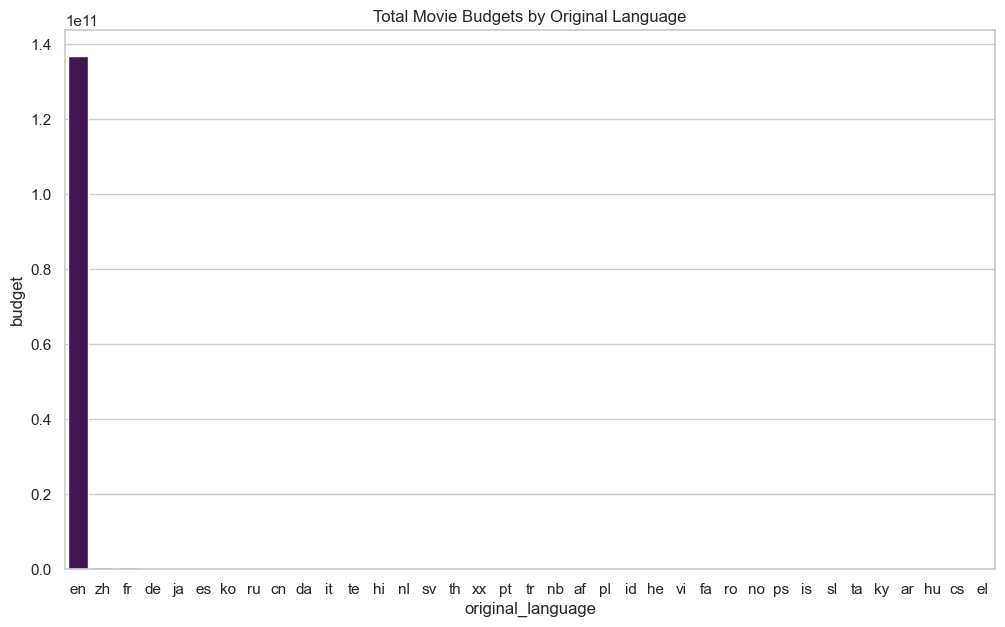

In [22]:
language_budget = movie_data.groupby('original_language')['budget'].sum().reset_index()
language_budget = language_budget.sort_values(by='budget', ascending=False)

plt.figure(figsize=(12, 7))
sns.barplot(x='original_language', y='budget', data=language_budget, palette="viridis")
plt.title('Total Movie Budgets by Original Language')
plt.xlabel('original_language')
plt.ylabel('budget')
plt.show()


### Scatterplot Popularity vs budget

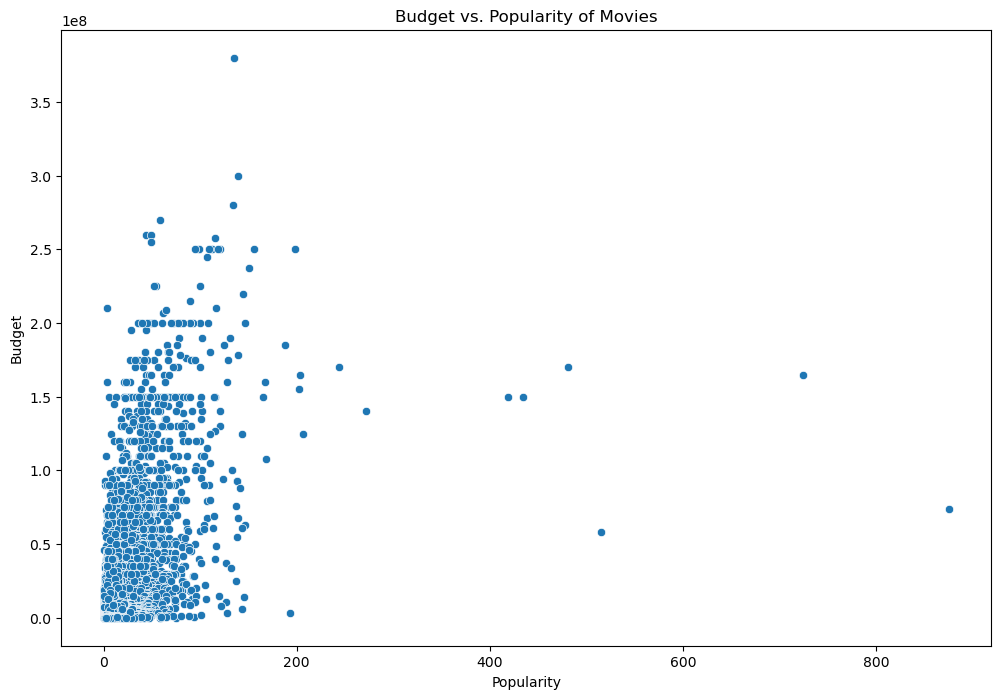

In [5]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='budget', data=movie_data)
plt.title('Budget vs. Popularity of Movies')
plt.xlabel('Popularity')
plt.ylabel('Budget')
plt.show()


In [78]:

popularity_threshold = 100  # You would define what constitutes a popular movie
budget_threshold = 50000000  # You would define what constitutes a high budget

# Categorize movies by popularity
movie_data['is_popular'] = movie_data['popularity'] >= popularity_threshold

# Categorize movies by budget
movie_data['has_high_budget'] = movie_data['budget'] >= budget_threshold

# Now calculate the probabilities:
# P(High Budget | Popular)
popular_movies = movie_data[movie_data['is_popular']]
prob_high_budget_given_popular = (popular_movies['has_high_budget'].sum() / popular_movies.shape[0]) * 100

print(f"The probability of a movie having a high budget given it is popular: {prob_high_budget_given_popular:.2f}%")

# If you also wanted to do the opposite:
# P(Popular | High Budget)
high_budget_movies = movie_data[movie_data['has_high_budget']]
prob_popular_given_high_budget = (high_budget_movies['is_popular'].sum() / high_budget_movies.shape[0]) * 100

print(f"The probability of a movie being popular given it has a high budget: {prob_popular_given_high_budget:.2f}%")


The probability of a movie having a high budget given it is popular: 82.42%
The probability of a movie being popular given it has a high budget: 7.57%


### Line plot to show the diffrence in revenue and budget

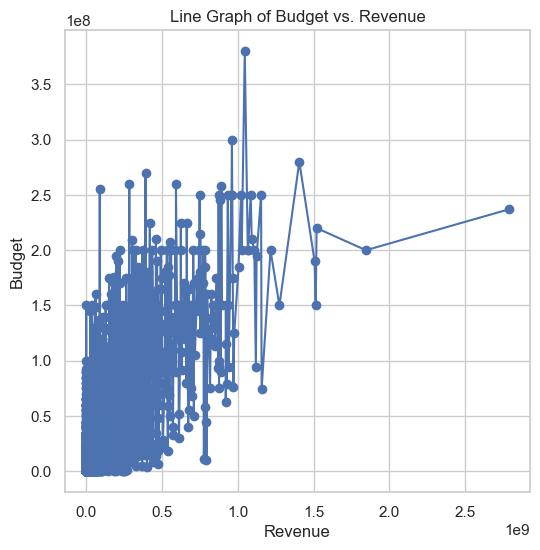

In [35]:
movie_data_sorted = movie_data.sort_values(by='revenue')

# Create a line plot
plt.figure(figsize=(6, 6))
plt.plot(movie_data_sorted['revenue'], movie_data_sorted['budget'], marker='o')  # 'o' is optional, adds markers to the line
plt.title('Line Graph of Budget vs. Revenue')
plt.xlabel('Revenue')
plt.ylabel('Budget')
plt.grid(True)  
plt.show()

In [83]:

revenue_threshold = movie_data['revenue'].quantile(0.75)  # High revenue could be defined as the top 25% of all revenue

movie_data['is_high_earning'] = movie_data['revenue'] >= revenue_threshold

budget_threshold = movie_data['budget'].quantile(0.75)  # High budget could be defined as the top 25% of all budgets

movie_data['is_high_budget'] = movie_data['budget'] >= budget_threshold


high_earning_movies = movie_data[movie_data['is_high_earning']]
prob_high_budget_given_high_earning = (high_earning_movies['is_high_budget'].sum() / high_earning_movies.shape[0]) * 100


high_budget_movies = movie_data[movie_data['is_high_budget']]
prob_high_earning_given_high_budget = (high_budget_movies['is_high_earning'].sum() / high_budget_movies.shape[0]) * 100

print(f"The probability of a movie being high budget given high revenue: {prob_high_budget_given_high_earning:.2f}%")
print(f"The probability of a movie bring high revenue given high budget: {prob_high_earning_given_high_budget:.2f}%")


The probability of a movie being high budget given high revenue: 68.61%
The probability of a movie bring high revenue given high budget: 66.56%


### A scatter plot and a line plot to show the relation between the years of release and budget.

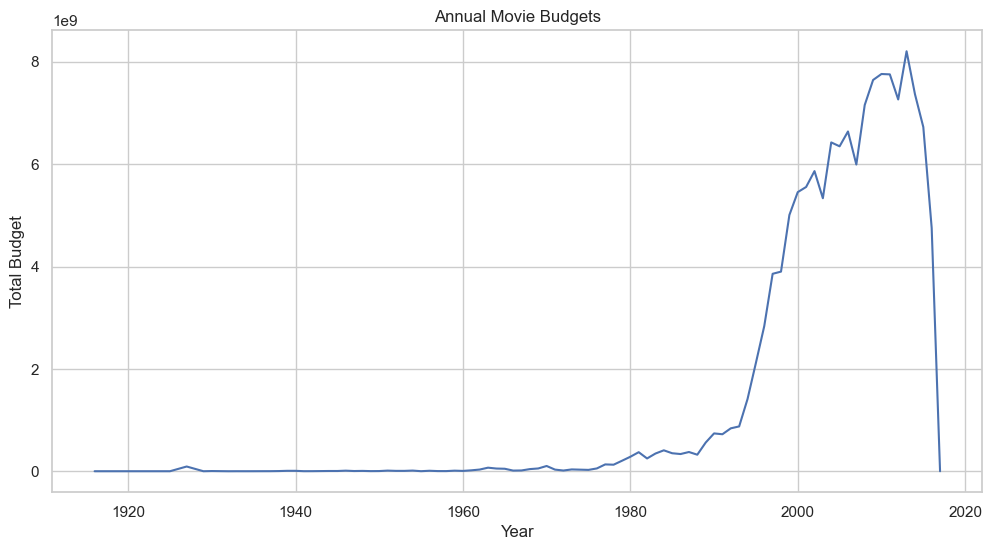

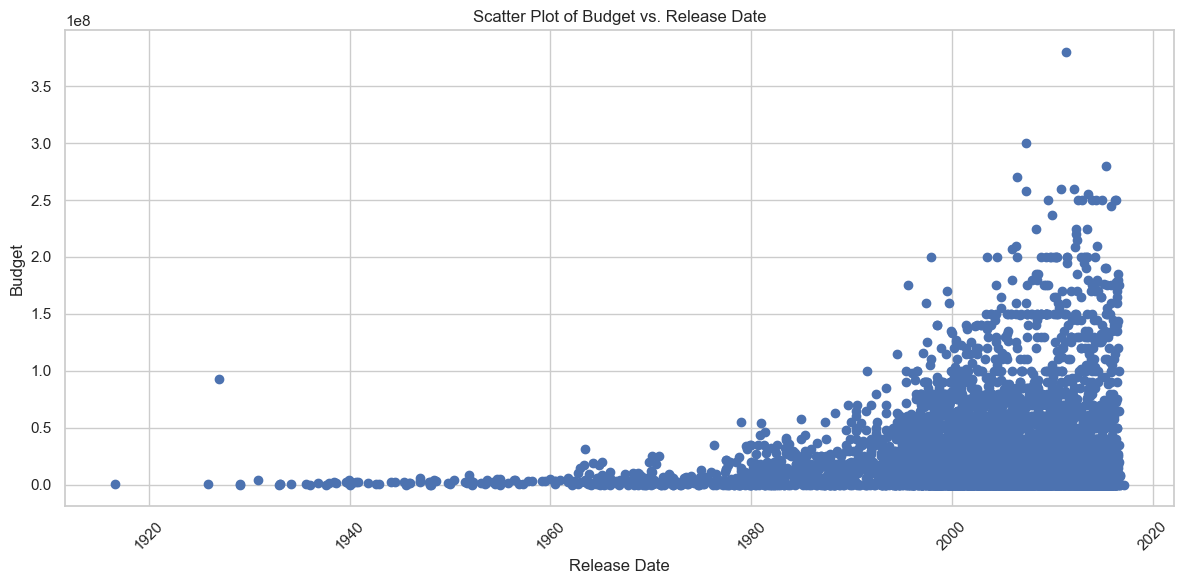

In [38]:

movie_data['release_date'] = pd.to_datetime(movie_data['release_date'], format='%d-%m-%Y')

annual_budget = movie_data.groupby(movie_data['release_date'].dt.year)['budget'].sum()

# Create a line plot for annual budget trends
plt.figure(figsize=(12, 6))
annual_budget.plot(kind='line')
plt.title('Annual Movie Budgets')
plt.xlabel('Year')
plt.ylabel('Total Budget')
plt.grid(True)
plt.show()

# Create a scatter plot for 'release_date' vs 'budget'
plt.figure(figsize=(12, 6))
plt.scatter(movie_data['release_date'], movie_data['budget'])
plt.title('Scatter Plot of Budget vs. Release Date')
plt.xlabel('Release Date')
plt.ylabel('Budget')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()


In [84]:
budget_threshold = movie_data['budget'].quantile(0.75)


movie_data['is_high_budget'] = (movie_data['budget'] >= budget_threshold).astype(int)

prob_high_budget = movie_data['is_high_budget'].mean()

print(f"The probability of a movie having a high budget is: {prob_high_budget:.2f}")

The probability of a movie having a high budget is: 0.26


### Bar graph Budget VS vote average

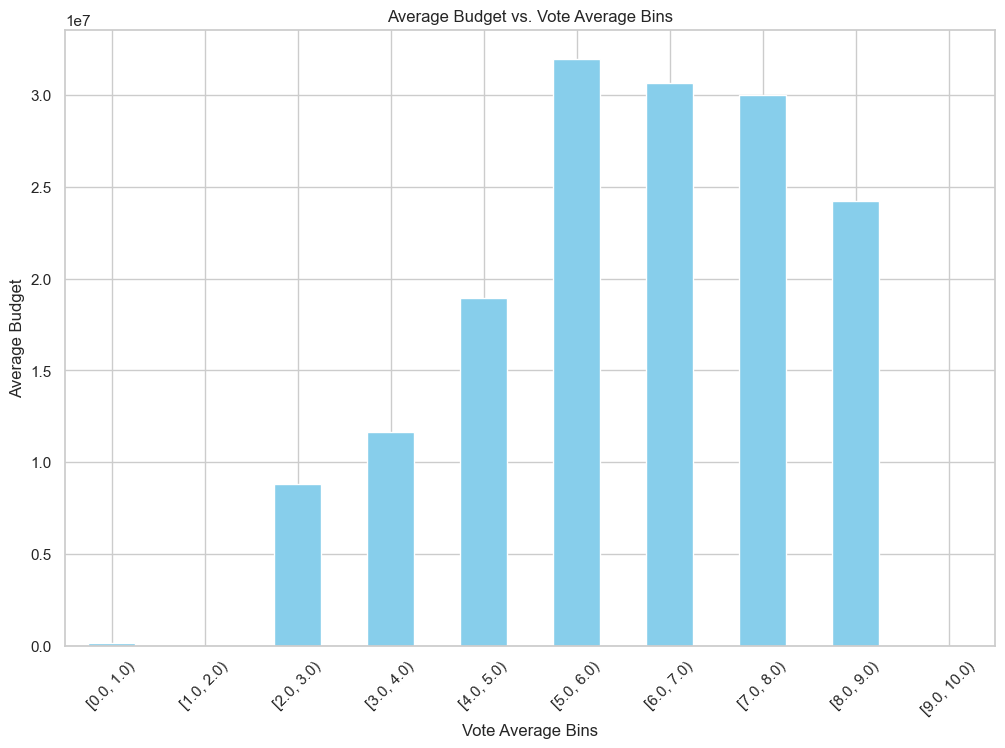

In [39]:
movie_data['vote_average_bin'] = pd.cut(movie_data['vote_average'], bins=np.arange(0, 10.1, 1), right=False)


average_budget_per_vote_bin = movie_data.groupby('vote_average_bin')['budget'].mean()


plt.figure(figsize=(12, 8))
average_budget_per_vote_bin.plot(kind='bar', color='skyblue')
plt.title('Average Budget vs. Vote Average Bins')
plt.xlabel('Vote Average Bins')
plt.ylabel('Average Budget')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Scatter plot of budget vs vote_count

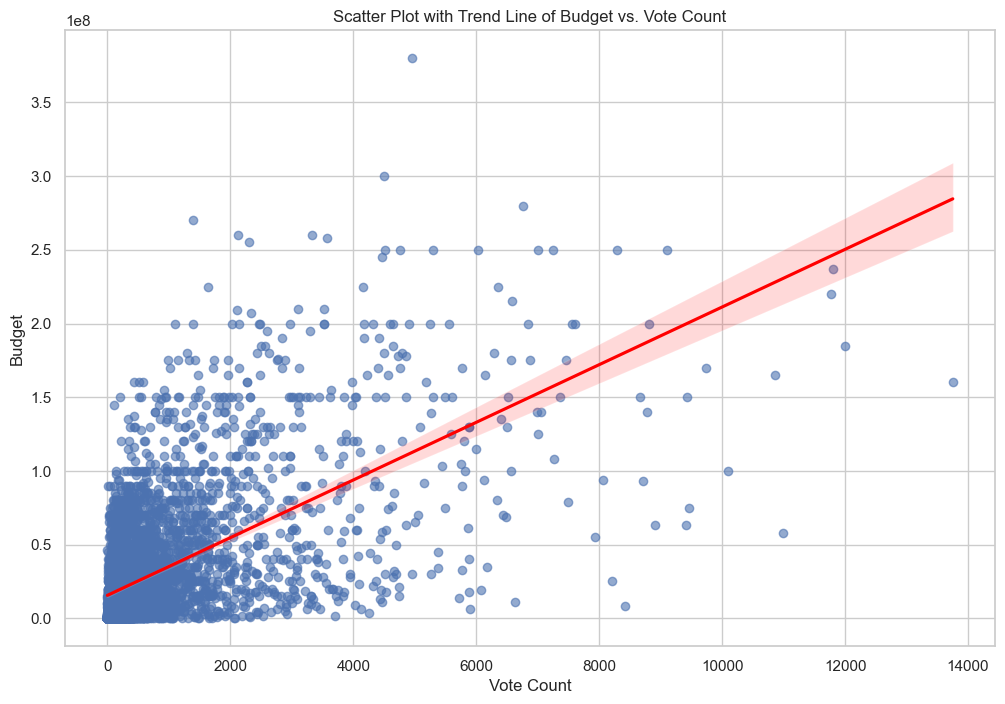

In [46]:

plt.figure(figsize=(12, 8))
sns.regplot(x='vote_count', y='budget', data=movie_data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Budget vs. Vote Count')
plt.ylabel('Budget')
plt.xlabel('Vote Count')
plt.show()




### Scatter Plot and bar graph of popularity vs revenue

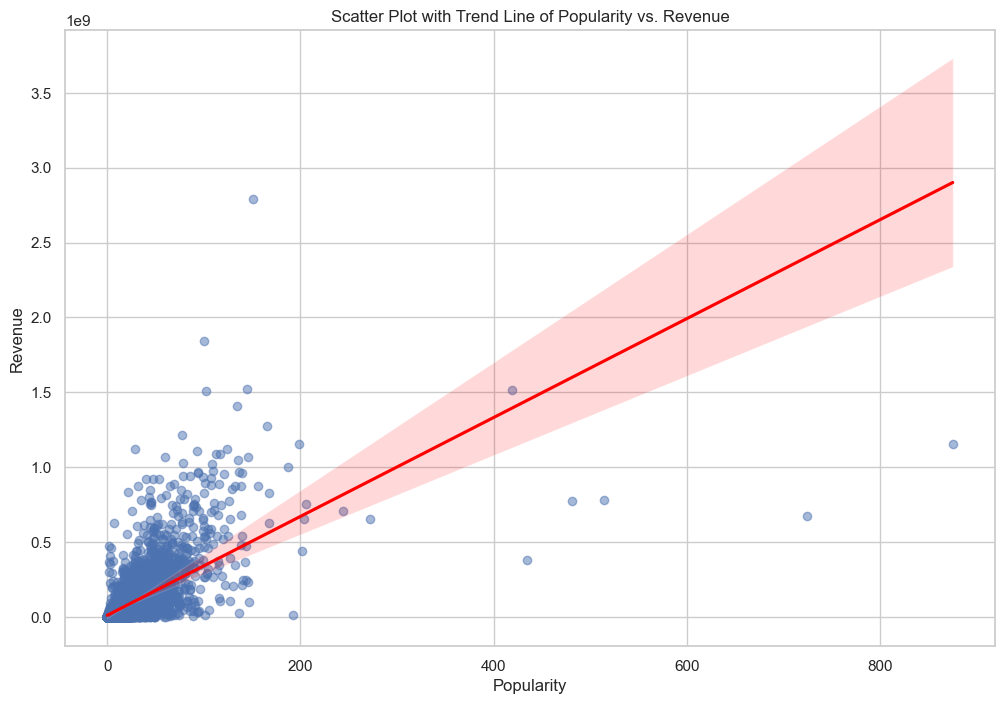

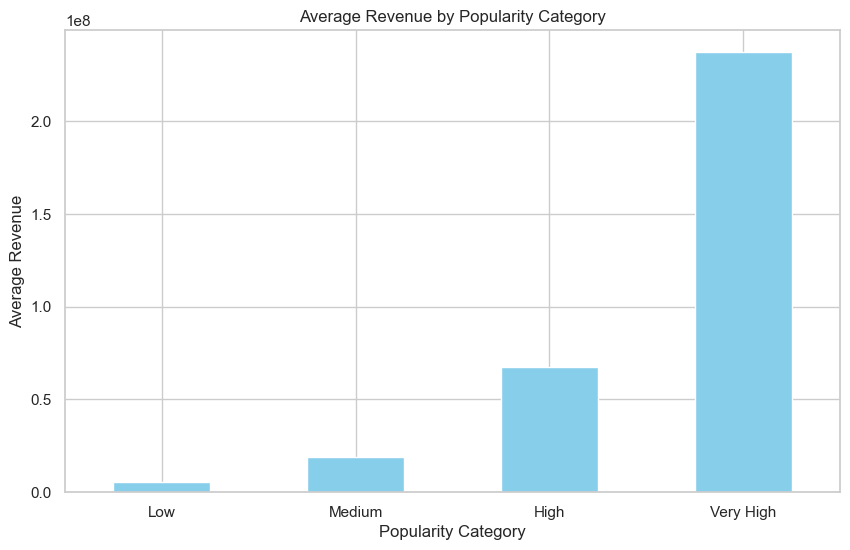

In [44]:
plt.figure(figsize=(12, 8))
sns.regplot(x='popularity', y='revenue', data=movie_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Popularity vs. Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue')
plt.show()

popularity_bins = pd.qcut(movie_data['popularity'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Add the bins to the DataFrame
movie_data['popularity_category'] = popularity_bins

# Calculate the average revenue for each category of popularity
average_revenue_per_category = movie_data.groupby('popularity_category')['revenue'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
average_revenue_per_category.plot(kind='bar', color='skyblue')
plt.title('Average Revenue by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=0)  # Keeps the category labels horizontal
plt.show()

### Bar graph for popularity vs runtime

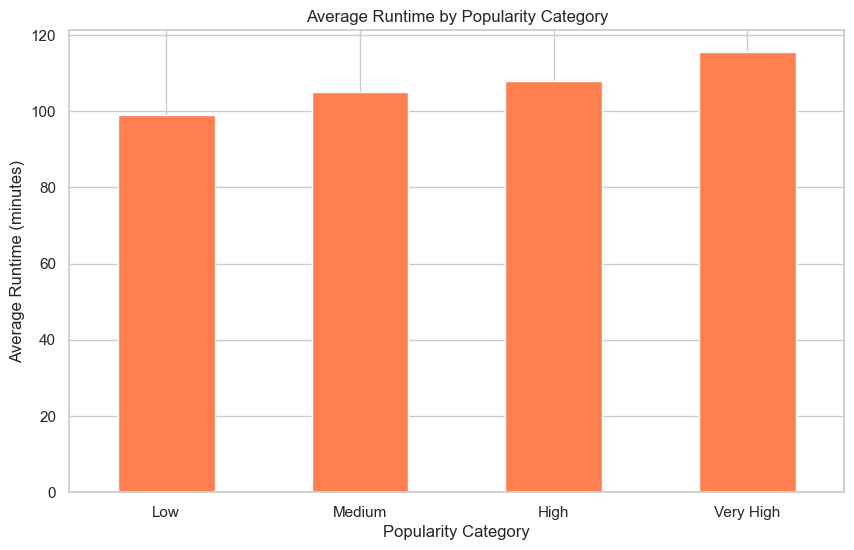

In [47]:
popularity_bins = pd.qcut(movie_data['popularity'], 4, labels=['Low', 'Medium', 'High', 'Very High'])

# Add the bins to the DataFrame
movie_data['popularity_category'] = popularity_bins

# Calculate the average runtime for each category of popularity
average_runtime_per_category = movie_data.groupby('popularity_category')['runtime'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
average_runtime_per_category.plot(kind='bar', color='coral')
plt.title('Average Runtime by Popularity Category')
plt.xlabel('Popularity Category')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=0)  # Keeps the category labels horizontal
plt.show()

### Scatter plot for runtime vs revenue

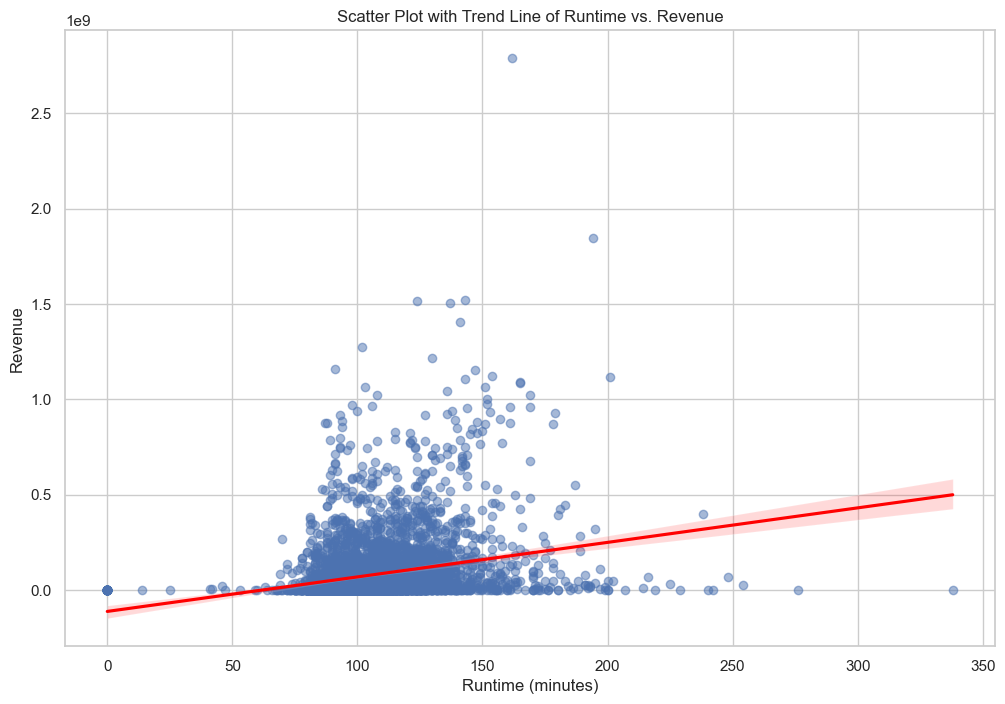

In [48]:
plt.figure(figsize=(12, 8))
sns.regplot(x='runtime', y='revenue', data=movie_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Runtime vs. Revenue')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Revenue')
plt.show()

### Scatter plot for runtime vs vote average

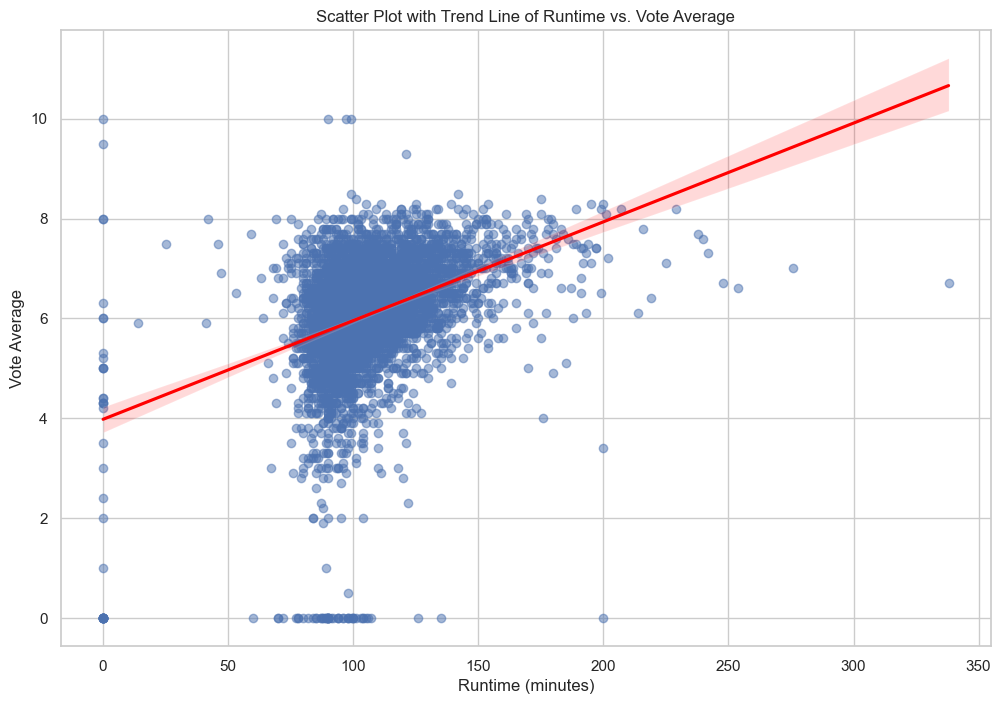

In [49]:
plt.figure(figsize=(12, 8))
sns.regplot(x='runtime', y='vote_average', data=movie_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot with Trend Line of Runtime vs. Vote Average')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Average')
plt.show()

### Scatter plot for runtime vs vote count

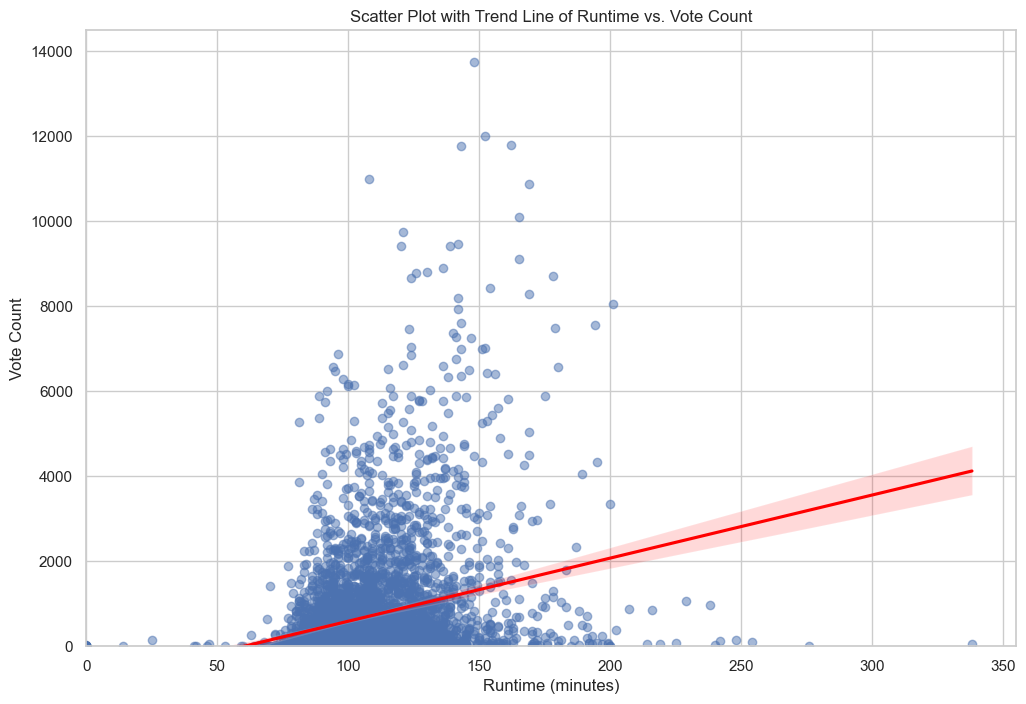

In [54]:
plt.figure(figsize=(12, 8))
sns.regplot(x='runtime', y='vote_count', data=movie_data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xlim(left=0)  # This sets the lower x-axis limit to 0
plt.xticks([0, 50, 100, 150, 200, 250, 300, 350])  # Set x-ticks manually

# Set the limits for the y-axis
plt.ylim(bottom=0)  # This sets the lower y-axis limit to 0
#CHAT GPT
plt.title('Scatter Plot with Trend Line of Runtime vs. Vote Count')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Vote Count')
plt.show()

### Line graph for relase date vs vote average

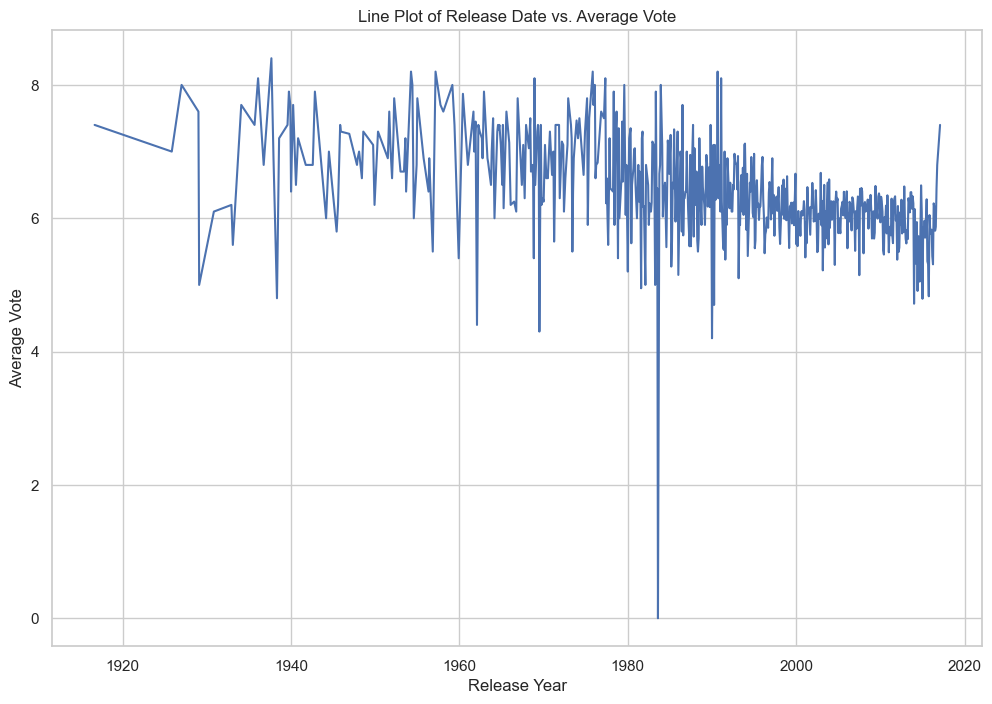

In [85]:

average_vote_by_date = movie_data.groupby(movie_data['release_date'].dt.to_period('M'))['vote_average'].mean()

average_vote_by_date.index = average_vote_by_date.index.to_timestamp()

plt.figure(figsize=(12, 8))
plt.plot(average_vote_by_date.index, average_vote_by_date.values)
plt.title('Line Plot of Release Date vs. Average Vote')
plt.xlabel('Release Year')
plt.ylabel('Average Vote')
plt.show()




### Scatter plot for budget vs runtime

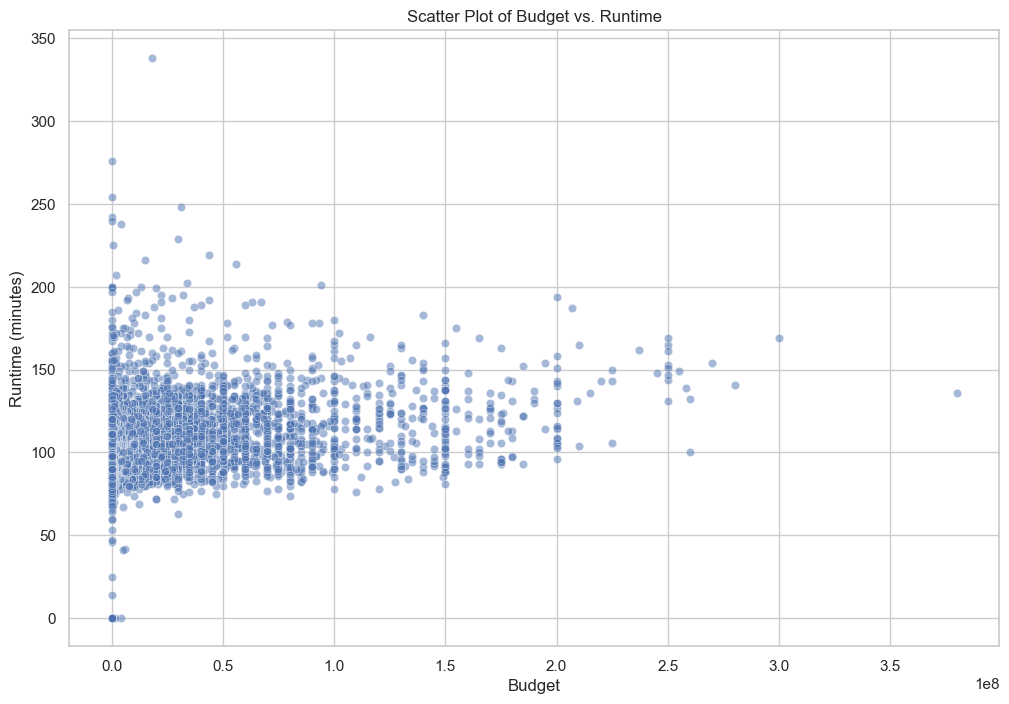

In [60]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='budget', y='runtime', data=movie_data, alpha=0.5)
plt.title('Scatter Plot of Budget vs. Runtime')
plt.xlabel('Budget')
plt.ylabel('Runtime (minutes)')
plt.show()

### Scatter plot for popularity vs vote average

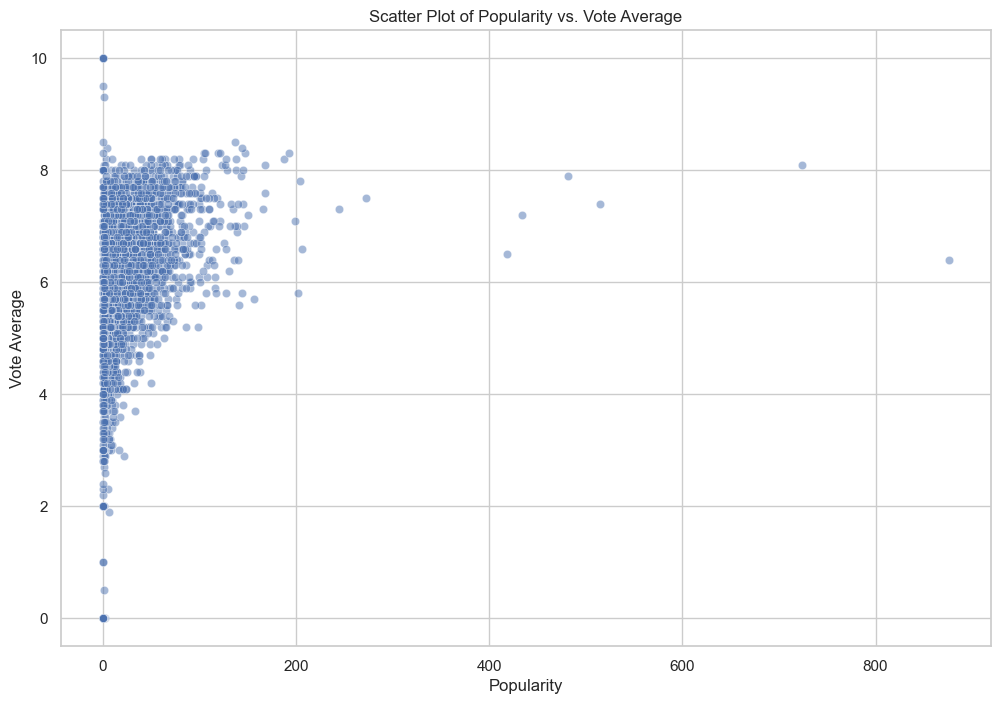

In [61]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='popularity', y='vote_average', data=movie_data, alpha=0.5)
plt.title('Scatter Plot of Popularity vs. Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.show()

### Bar graph for popularity vs vote count

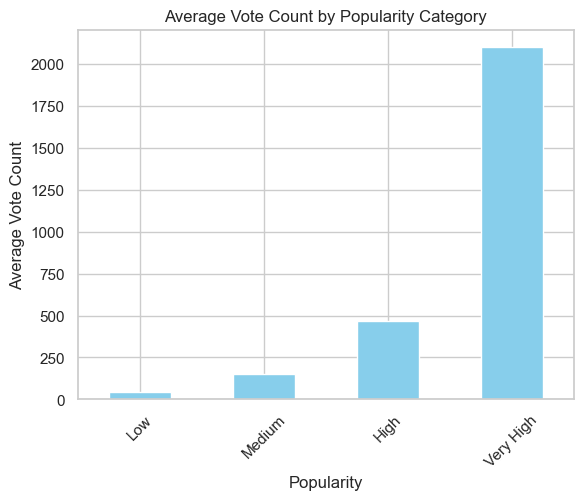

In [63]:
popularity_categories = pd.qcut(movie_data['popularity'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate average vote count for each popularity category
average_vote_count_by_popularity = movie_data.groupby(popularity_categories)['vote_count'].mean()

# Plot the bar graph
average_vote_count_by_popularity.plot(kind='bar', color='skyblue')
plt.title('Average Vote Count by Popularity Category')
plt.xlabel('Popularity')
plt.ylabel('Average Vote Count')
plt.xticks(rotation=45)  # Rotate the labels for better readability if needed
plt.show()

### Scatterplot for revenue vs vote average scatter plot

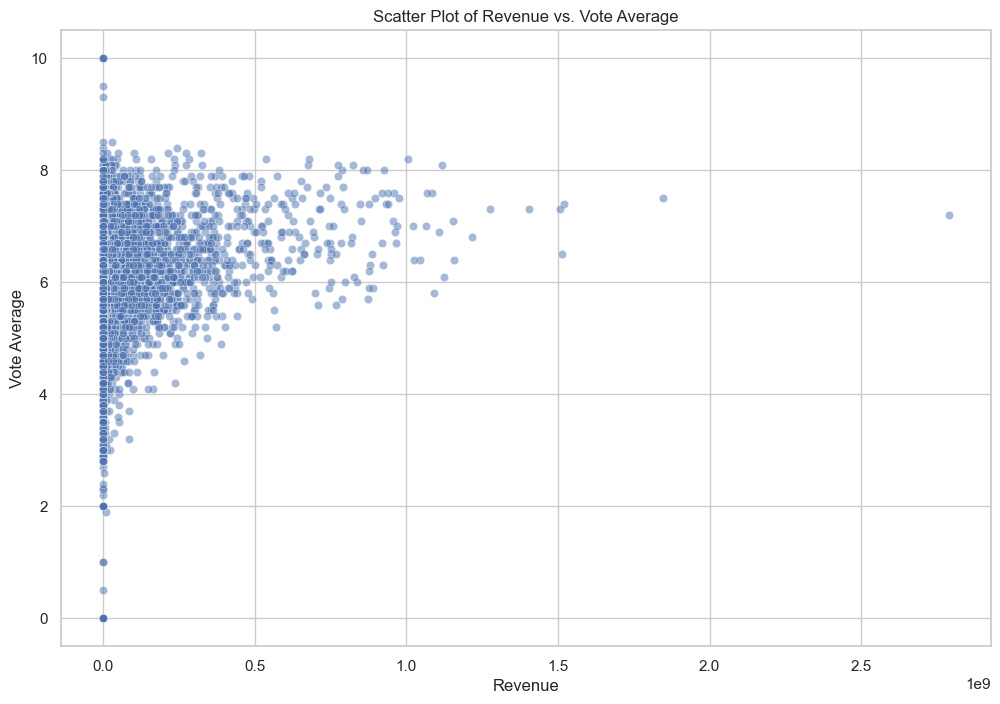

In [64]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='revenue', y='vote_average', data=movie_data, alpha=0.5)
plt.title('Scatter Plot of Revenue vs. Vote Average')
plt.xlabel('Revenue')
plt.ylabel('Vote Average')
plt.show()

### Scatter plot for revenue vs vote_count

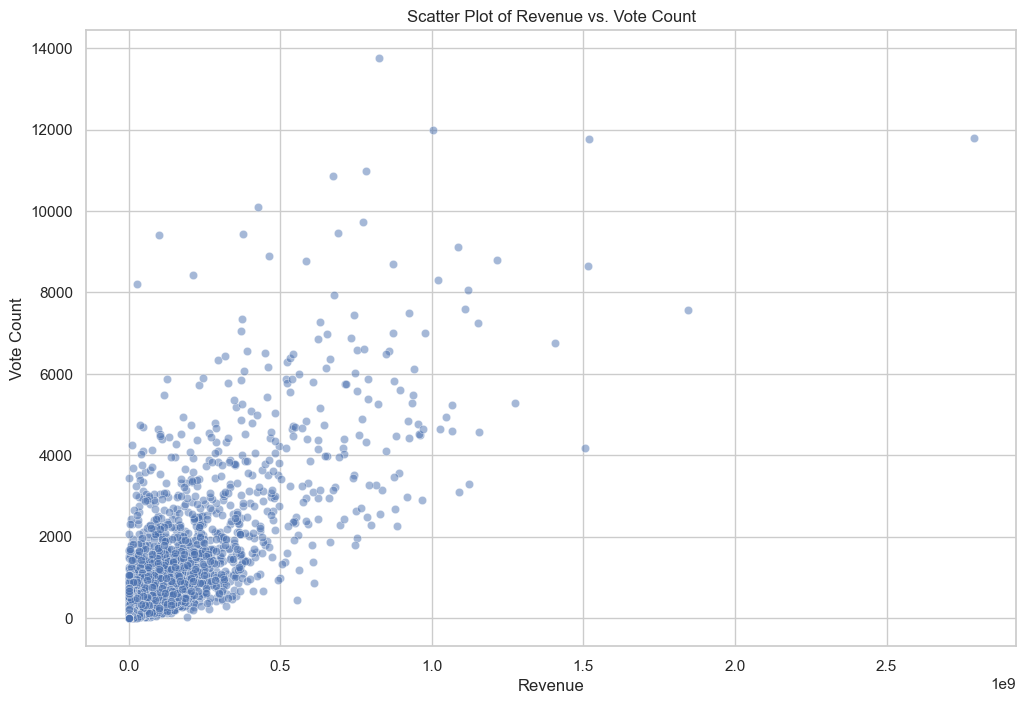

In [65]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='revenue', y='vote_count', data=movie_data, alpha=0.5)
plt.title('Scatter Plot of Revenue vs. Vote Count')
plt.xlabel('Revenue')
plt.ylabel('Vote Count')
plt.show()

### Scatter plot for release date vs popularity

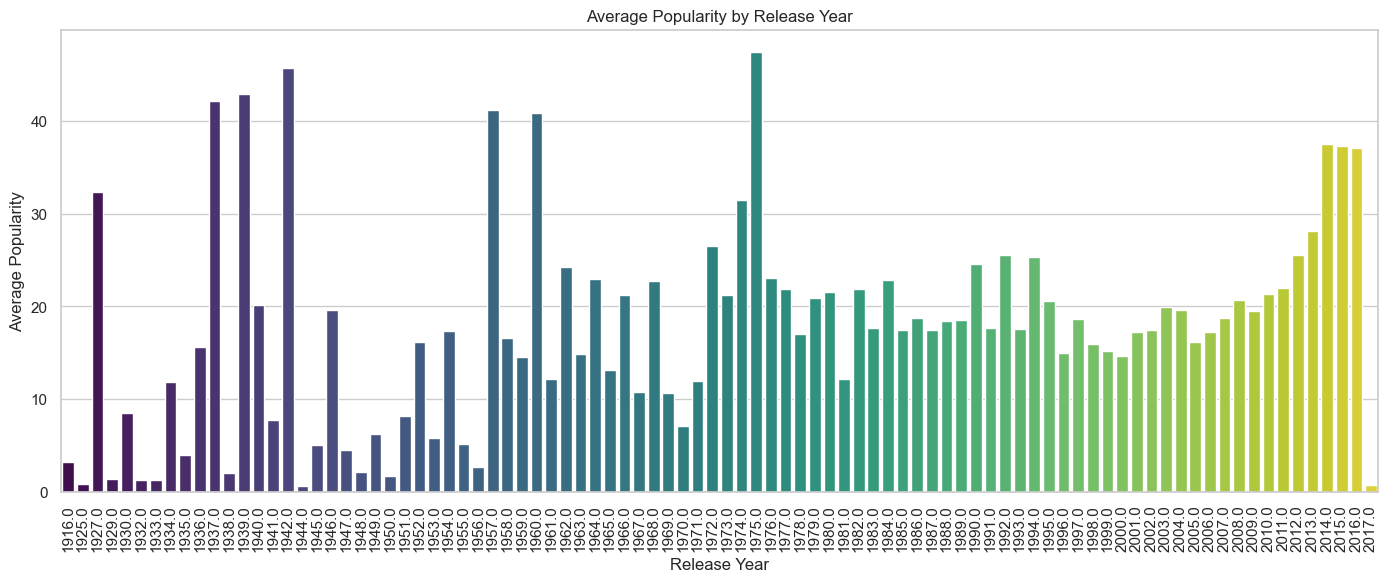

In [94]:
movie_data['release_year'] = movie_data['release_date'].dt.year  # Use dt.month for monthly data
average_popularity_by_year = movie_data.groupby('release_year')['popularity'].mean().reset_index()
average_popularity_by_year = average_popularity_by_year.sort_values('release_year')

plt.figure(figsize=(17, 6))
sns.barplot(x='release_year', y='popularity', data=average_popularity_by_year, palette='viridis')
plt.title('Average Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Popularity')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.show()

### Bargraph for release date vs vote count

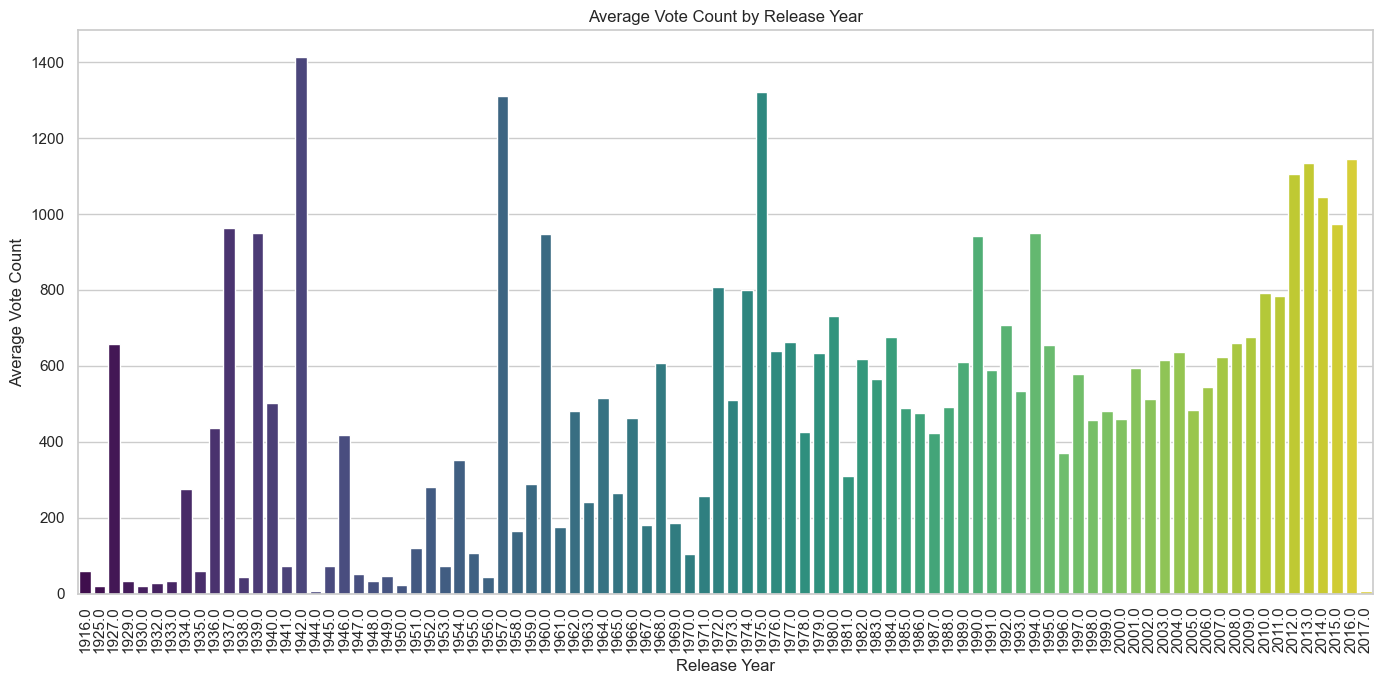

In [87]:
movie_data['release_date'] = pd.to_datetime(movie_data['release_date'])

average_vote_count_by_year = movie_data.groupby(movie_data['release_date'].dt.year)['vote_count'].mean().reset_index()

average_vote_count_by_year = average_vote_count_by_year.sort_values('release_date')

plt.figure(figsize=(14, 7))
sns.barplot(x='release_date', y='vote_count', data=average_vote_count_by_year, palette='viridis')
plt.title('Average Vote Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Vote Count')
plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.tight_layout()  # Adjust layout to make room for label rotation
plt.show()

## Discussion and Conclusion

The graphs collectively provide insights into the dynamics of the movie industry, particularly concerning the interplay between budget, revenue, runtime, vote average, vote count, popularity, and the release year.

**Runtime vs. Revenue**: Longer movies seem to have a potential for higher revenue, but the trend is not very strong. This could mean that while epic storytelling might attract larger revenues, it's not a guarantee.

**Runtime vs. Vote Average**: Movies with longer runtimes tend to have higher ratings. This might suggest that more developed narratives and characters, which require more screen time, are better received by audiences.

**Runtime vs. Vote Count**: There appears to be a slight trend suggesting that longer movies receive more votes. This could be interpreted as a higher engagement or interest from the audience in movies with more extended narratives.

**Release Date vs. Average Vote**: The average vote does not show a clear trend over time, which could indicate that the quality, as perceived by viewers, does not necessarily improve or worsen as time progresses.

**Budget vs. Runtime**: There is no strong indication that higher-budget movies are longer. The production budget is likely allocated to various aspects beyond just the length of the movie.

**Popularity vs. Vote Average**: Very popular movies do not necessarily have high vote averages. Popularity may stem from marketing and other factors that don't always coincide with the quality ratings from viewers.

**Average Vote Count by Popularity Category**: As expected, movies that are more popular have a higher vote count, which indicates that popular movies tend to engage more viewers to vote, perhaps due to wider distribution and marketing reach.

**Revenue vs. Vote Average**: The relationship between revenue and the vote average is not pronounced. While some high-revenue movies have good ratings, the scatter is quite spread, suggesting other factors at play in revenue generation.

**Revenue vs. Vote Count**: A positive trend suggests that higher-grossing movies have more votes. This likely reflects that commercially successful movies draw more viewers who then cast votes.

**Average Popularity by Release Year**: Recent years have seen an increase in the average popularity of movies. This could be due to the modern era's enhanced marketing techniques and the proliferation of digital platforms increasing movie accessibility and hence their popularity scores.

**Total Movie Budgets by Original Language**: Movies in the English language appear to have significantly higher total budgets than movies in other languages. This suggests that the English-language film market, likely dominated by Hollywood, has more significant financial backing than other language film industries.

**Budget vs. Popularity of Movies**: There doesn't seem to be a strong linear correlation between a movie's budget and its popularity. While there are some popular movies with high budgets, there are also many with lower budgets, indicating that a large budget does not necessarily guarantee popularity.

**Line Graph of Budget vs. Revenue**: The relationship between budget and revenue does not appear linear and shows a lot of variability. Some high-revenue movies have modest budgets, while some high-budget movies do not earn proportionally high revenue. This suggests that while budget can impact revenue, it is not the only determining factor for a film's financial success.

**Annual Movie Budgets**: There has been a significant increase in annual movie budgets over time, particularly sharp in recent years. This could reflect the growing scale of movie production and potentially the effects of inflation.

**Scatter Plot of Budget vs. Release Date:** This plot shows that more recent movies tend to have higher budgets. This trend aligns with the increase observed in the annual movie budgets graph and might reflect the increasing costs of movie production or a shift in the industry towards more high-budget films.

**Average Budget vs. Vote Average Bins**: Movies with higher average vote ratings tend to have higher budgets, suggesting that there might be a correlation between the amount of money spent on a film and its perceived quality by viewers.

**Budget vs. Vote Count**: There is a noticeable trend where movies with higher budgets tend to have a higher vote count, which could indicate that more expensive movies draw more attention and, hence, more votes.

**Popularity vs. Revenue**: The scatter plot with a trend line indicates a positive relationship between a movie's popularity and its revenue. More popular films tend to generate higher revenues, which is expected as popularity can drive box office sales.

**Average Revenue by Popularity Category**: There's a clear trend that movies categorized as more popular generate significantly higher average revenue. This reinforces the idea that popularity is closely linked to financial success.

**Average Runtime by Popularity Category**: The runtime of movies does not significantly vary with popularity. Most movies, regardless of their popularity level, have similar average runtimes, indicating that runtime is not a key factor in popularity.

The results indicated that while English-language films generally have higher budgets, a larger budget does not necessarily correlate with higher popularity or superior quality ratings. There's a trend that more popular films tend to have higher revenues, pointing to the importance of factors beyond just the budget, such as effective marketing and broad appeal.

The primary research question seems to explore the relationships between a movie's financial investment, popularity, and perceived quality. The analysis quantitatively revealed that the popularity of a film has a more pronounced effect on revenue than the budget, with higher popularity often leading to higher revenue. However, the budget does not consistently affect a movie's vote average or count.

In future analyses, having direct access to the data would allow for more precise statistical methods, such as regression analysis, to quantify the relationships between variables. Additionally, incorporating more variables could give a clearer picture of what drives movie success.

### References

1. anandshaw2001. “Movie Rating Dataset.” Kaggle, 8 Mar. 2024, www.kaggle.com/datasets/anandshaw2001/movie-rating-dataset. 
2. (N.d.). Retrieved from http://www.chat.openai.com/ 
prompt: (how to make the graphs more readable?)(formatting in print statement)(making bar graph colourful)